## Libraries

In [191]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

## Functions

In [220]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
        
def str2Hex(value):
    returned=int(value,16)
    if(returned==254):returned=0
    return returned

def hex2bin(value):
    return bin(value)

def mergeInt(num):
    
    num1=format(num[0], '08b')
    num2=format(num[1], '08b')
    num3=format(num[2], '08b')
    num4=format(num[3], '08b')
    
    numStr=num1+num2+num3
    
    return int(numStr,2)
    #x = num[0]
    #y = num[1]
    #z=(x << 8) + y
    #x2 = num[2]
    #y2 = num[3]
    #z2=(x2 << 8) + y2
    #z3=(z << 8) + z2
    #return z2

def decodeFrame(intFrame):
    frame=np.zeros((8))
    frame[0]=mergeInt(intFrame[0:4])
    frame[1]=mergeInt(intFrame[4:8])
    frame[2]=mergeInt(intFrame[8:12])
    frame[3]=mergeInt(intFrame[12:16])
    frame[4]=mergeInt(intFrame[16:20])
    frame[5]=mergeInt(intFrame[20:24])
    frame[6]=mergeInt(intFrame[24:28])
    frame[7]=mergeInt(intFrame[28:32])
    return frame

def findNegatives(frame,infByte):
    for num in range(8):
        #print(infByte[num])
        if(infByte[num]==1):
            frame[num]=frame[num]*-1
        
    return frame


def readFrame(rawHex):  
    rawHexPair=list(chunks(rawHex, 2)) # Divide by pairs
    HexAsInt = list(map(str2Hex, rawHexPair)) # Convert to Int
    frame=findNegatives(decodeFrame(HexAsInt),HexAsInt[-8:])
    print(HexAsInt)
    return frame

In [536]:
# Load file
with open ('/home/lex/Desktop/outfile', 'rb') as fp:
    frameArray = pickle.load(fp)
    
# Data
ppg1=np.zeros((len(frameArray)))
ppg2=np.zeros((len(frameArray)))
# Accelerometers
acc1X=np.zeros((len(frameArray)))
acc1Y=np.zeros((len(frameArray)))
acc1Z=np.zeros((len(frameArray)))

acc2X=np.zeros((len(frameArray)))
acc2Y=np.zeros((len(frameArray)))
acc2Z=np.zeros((len(frameArray)))

    
for num in range(len(frameArray)):
    
    frame=readFrame(frameArray[num])
    print(frame)
    
    acc1X[num]=frame[0]
    acc1Y[num]=frame[1]
    acc1Z[num]=frame[2]
    
    
    acc2X[num]=frame[3]
    acc2Y[num]=frame[4]
    acc2Z[num]=frame[5]
    
    ppg1[num]=frame[6]
    ppg2[num]=frame[7]

[0, 21, 32, 0, 0, 1, 160, 0, 0, 2, 64, 0, 0, 21, 0, 0, 0, 1, 64, 0, 0, 1, 16, 0, 0, 2, 224, 0, 0, 2, 113, 0, 1, 1, 0, 0, 0, 0, 15]
[ 5408.  -416.  -576.  5376.   320.   272.   736.   625.]
[0, 21, 32, 0, 0, 1, 160, 0, 0, 2, 64, 0, 0, 21, 0, 0, 0, 1, 64, 0, 0, 1, 16, 0, 0, 3, 26, 0, 0, 2, 111, 0, 1, 1, 0, 0, 0, 0, 15]
[ 5408.  -416.  -576.  5376.   320.   272.   794.   623.]
[0, 21, 16, 0, 0, 1, 144, 0, 0, 2, 96, 0, 0, 21, 32, 0, 0, 1, 64, 0, 0, 1, 0, 0, 0, 3, 159, 0, 0, 2, 110, 0, 1, 1, 0, 0, 0, 0, 15]
[ 5392.  -400.  -608.  5408.   320.   256.   927.   622.]
[0, 21, 48, 0, 0, 1, 160, 0, 0, 2, 48, 0, 0, 21, 96, 0, 0, 1, 144, 0, 0, 0, 240, 0, 0, 3, 223, 0, 0, 2, 117, 0, 1, 1, 0, 0, 0, 0, 15]
[ 5424.  -416.  -560.  5472.   400.   240.   991.   629.]
[0, 21, 32, 0, 0, 1, 112, 0, 0, 2, 0, 0, 0, 21, 48, 0, 0, 1, 144, 0, 0, 1, 0, 0, 0, 3, 216, 0, 0, 2, 132, 0, 1, 1, 0, 0, 0, 0, 15]
[ 5408.  -368.  -512.  5424.   400.   256.   984.   644.]
[0, 21, 48, 0, 0, 1, 80, 0, 0, 2, 0, 0, 0, 21, 80, 0,

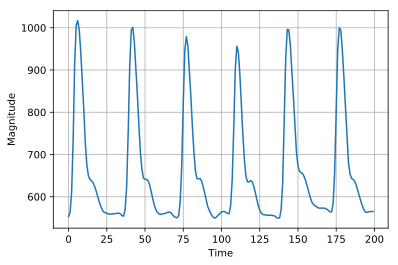

In [541]:
# ppg1= Left  ppg2= Right
#plt.plot(ppg2)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.plot()
plt.plot(ppg1[600:800])
plt.grid()
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.savefig("/home/lex/Desktop/test.svg")
plt.show()

In [238]:
ppg2.shape

(400,)

In [174]:
mergeInt([0,19,0,0])



1245184

In [551]:
fid = open('/home/lex/Desktop/svg/cutecom.log')
dim = np.fromfile(fid, dtype='>u4')

In [552]:
dim

array([4261543425, 4278124286, 4262732030, ..., 4261589246, 4278124286,
       4261522430], dtype=uint32)

In [545]:
>>> import serial
>>> ser = serial.Serial('/dev/ttyUSB0')  # open serial port
>>> print(ser.name)         # check which port was really used
>>> ser.write(b'hello')     # write a string
>>> ser.close()             # close port

/dev/ttyUSB0


In [548]:
with serial.Serial('/dev/ttyUSB0', 9600, timeout=1) as ser:
    x = ser.read()          # read one byte
    s = ser.read(10)        # read up to ten bytes (timeout)
    line = ser.readline()   # read a '\n' terminated line
    print(ser.readline())

KeyboardInterrupt: 